In [9]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"C:\Users\nashi\Documents\GitHubProjects\Sievo\hidden-savings-risk-explorer\procurement.db")

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in DB:", tables)

# Preview first 5 rows
df_preview = pd.read_sql("SELECT * FROM procurement_data LIMIT 5;", conn)
print(df_preview.head())

conn.close()


Tables in DB:                name
0         suppliers
1         purchases
2  procurement_data
   lasku_id                                        tili  tiliointisumma  \
0  29512196  43920000 Asiantuntija- ja tutkimuspalvelut          126.68   
1  29512196  43920000 Asiantuntija- ja tutkimuspalvelut            4.42   
2  29512196  43920000 Asiantuntija- ja tutkimuspalvelut          144.35   
3  29512196  43920000 Asiantuntija- ja tutkimuspalvelut           14.73   
4  29512196  43920000 Asiantuntija- ja tutkimuspalvelut            4.42   

    tositepvm toimittaja_y_tunnus       toimittaja_nimi  \
0  2025-02-25           1503388-4  Senaatti-kiinteistöt   
1  2025-02-25           1503388-4  Senaatti-kiinteistöt   
2  2025-02-25           1503388-4  Senaatti-kiinteistöt   
3  2025-02-25           1503388-4  Senaatti-kiinteistöt   
4  2025-02-25           1503388-4  Senaatti-kiinteistöt   

  hankintayksikko_tunnus       hankintayksikko ylaorganisaatio_tunnus  \
0                    151  R

Top 10 suppliers by total spend:
                                     toimittaja_nimi   total_spend
0                                 Helsingin kaupunki  7.246042e+08
1                                         HUS-yhtymä  6.520271e+08
2                               Senaatti-kiinteistöt  3.507818e+08
3  Valtion tieto- ja viestintätekniikkakeskus Val...  2.337273e+08
4                                       GRK Suomi Oy  2.008908e+08
5                                          Destia Oy  1.929395e+08
6             Helsingin seudun liikenne -kuntayhtymä  1.824517e+08
7                                  Salassa pidettävä  1.604277e+08
8                                   PEAB INDUSTRI OY  1.603673e+08
9                LIIKENTEENOHJAUSYHTIÖ FINTRAFFIC OY  1.168673e+08


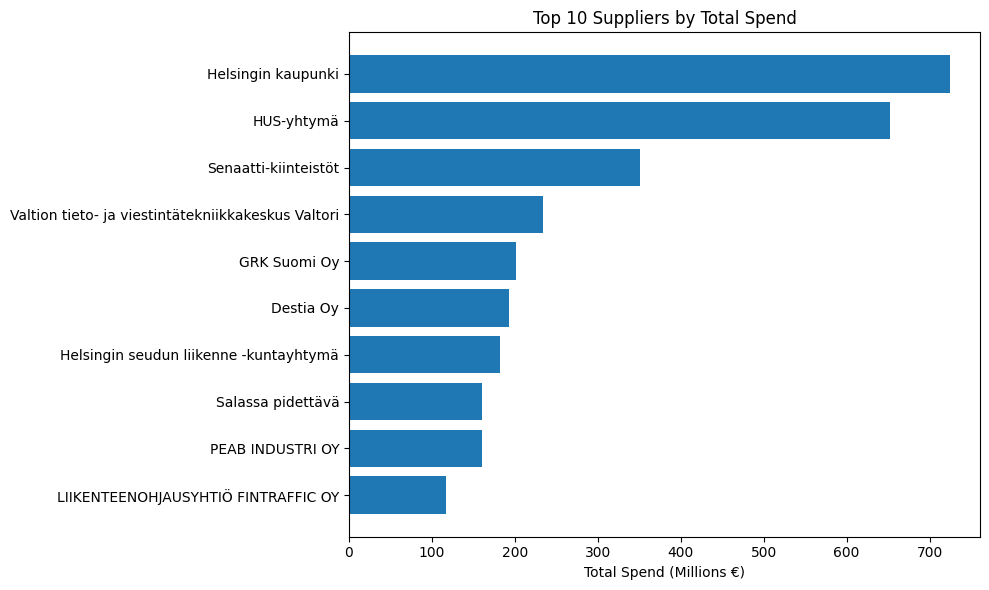

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = r"C:\Users\nashi\Documents\GitHubProjects\Sievo\hidden-savings-risk-explorer\procurement.db"
conn = sqlite3.connect(db_path)

# Top Suppliers by Spend
query_top_suppliers = """
SELECT toimittaja_nimi, SUM(tiliointisumma) AS total_spend
FROM procurement_data
GROUP BY toimittaja_nimi
ORDER BY total_spend DESC
LIMIT 10;
"""
top_suppliers = pd.read_sql(query_top_suppliers, conn)
print("Top 10 suppliers by total spend:")
print(top_suppliers)


plt.figure(figsize=(10,6))
plt.barh(top_suppliers['toimittaja_nimi'], top_suppliers['total_spend']/1e6)
plt.xlabel("Total Spend (Millions €)")
plt.title("Top 10 Suppliers by Total Spend")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





Top 10 procurement categories by total spend:
                                  hankintakategoria   total_spend
0                           Asiakaspalvelujen ostot  1.329202e+09
1                  Rakennusten ja alueiden ylläpito  1.270585e+09
2  ICT-hankinnat (tavarat, palvelut ja ohjelmistot)  1.227848e+09
3                                  Alueet ja väylät  8.678344e+08
4                                      Rakentaminen  8.577666e+08
5                           Hallinnolliset palvelut  8.066624e+08
6                 Asiantuntija- ja toimistopalvelut  4.614029e+08
7                           Käyttöomaisuushankinnat  4.538195e+08
8                     Aineet, tarvikkeet ja tavarat  3.113274e+08
9                   Majoitus- ja ravitsemispalvelut  1.035917e+08


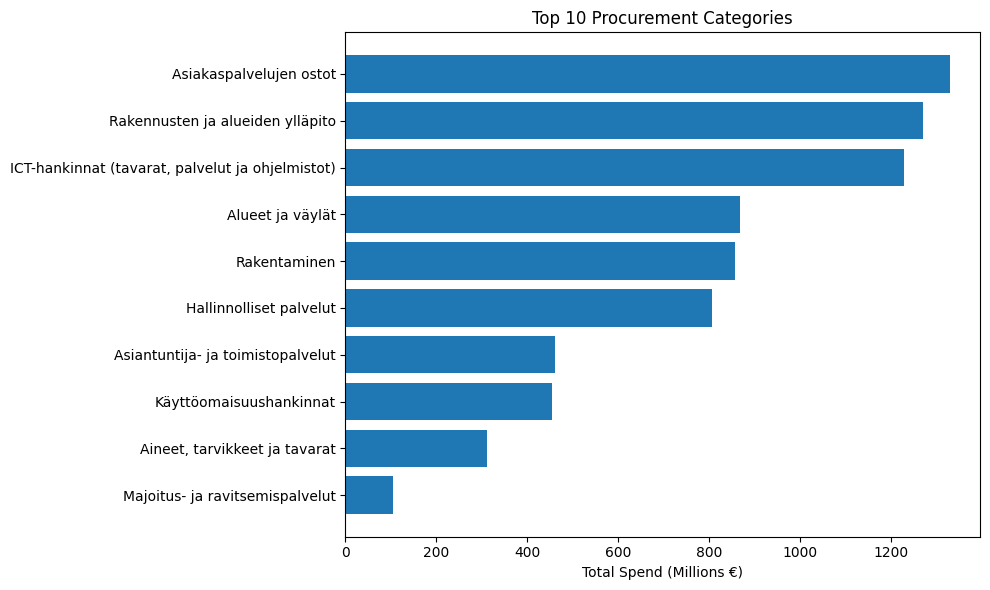

In [14]:
# Top Categories by Spend
query_top_categories = """
SELECT hankintakategoria, SUM(tiliointisumma) AS total_spend
FROM procurement_data
GROUP BY hankintakategoria
ORDER BY total_spend DESC
LIMIT 10;
"""
top_categories = pd.read_sql(query_top_categories, conn)
print("\nTop 10 procurement categories by total spend:")
print(top_categories)


plt.figure(figsize=(10,6))
plt.barh(top_categories['hankintakategoria'], top_categories['total_spend']/1e6)
plt.xlabel("Total Spend (Millions €)")
plt.title("Top 10 Procurement Categories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





Monthly Spend Trend (first 10 months):
     month   total_spend
0  2025-01  7.283825e+08
1  2025-02  7.778933e+08
2  2025-03  8.778767e+08
3  2025-04  9.008179e+08
4  2025-05  1.079618e+09
5  2025-06  1.005590e+09
6  2025-07  7.324030e+08
7  2025-08  7.807115e+08
8  2025-09  4.196910e+08
9  2025-10  4.348682e+08


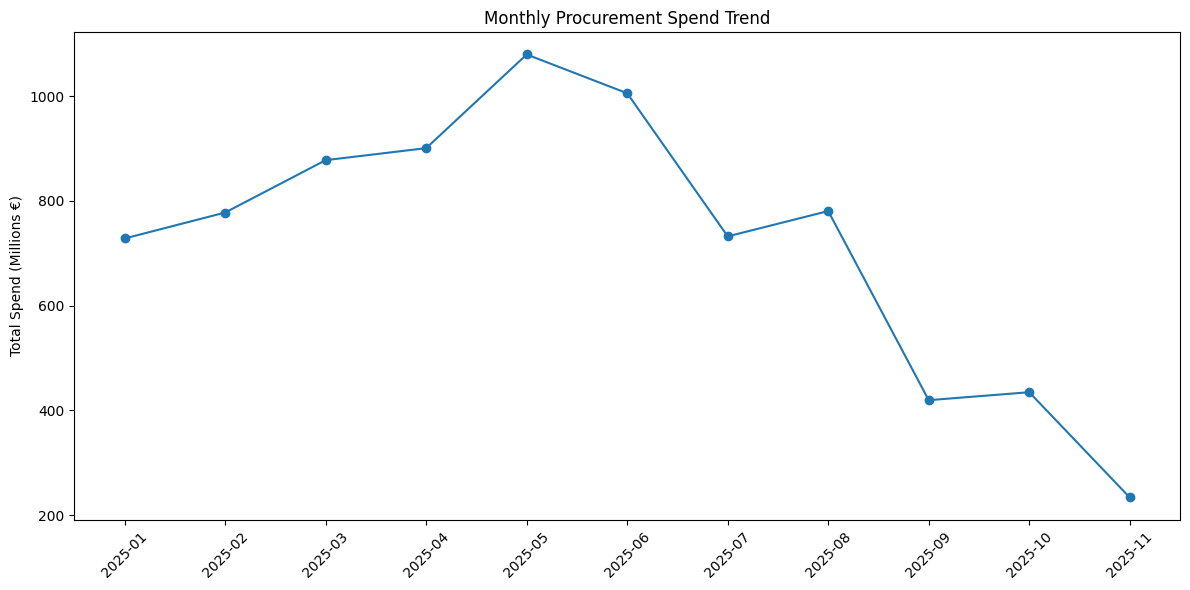

In [15]:
# Monthly Spend Trends
query_monthly_trends = """
SELECT strftime('%Y-%m', tositepvm) AS month, SUM(tiliointisumma) AS total_spend
FROM procurement_data
GROUP BY month
ORDER BY month;
"""
monthly_spend = pd.read_sql(query_monthly_trends, conn)
print("\nMonthly Spend Trend (first 10 months):")
print(monthly_spend.head(10))


plt.figure(figsize=(12,6))
plt.plot(monthly_spend['month'], monthly_spend['total_spend']/1e6, marker='o')
plt.xticks(rotation=45)
plt.ylabel("Total Spend (Millions €)")
plt.title("Monthly Procurement Spend Trend")
plt.tight_layout()
plt.show()
